# **Decision Tree Regression: Predict car prices**

Saving cars.xlsx to cars (3).xlsx

===== DATA LOADED FROM EXCEL FILE =====
   year  engine_size  mileage   price
0  2015          1.2    45000  350000
1  2017          1.5    32000  520000
2  2018          1.0    28000  410000
3  2014          1.3    60000  290000
4  2019          1.2    15000  550000

===== MODEL TRAINED SUCCESSFULLY =====

===== ASCII OUTPUT – PREDICTIONS =====
Car 1 | Actual: ₹500000 | Predicted: ₹450000
Car 2 | Actual: ₹520000 | Predicted: ₹450000


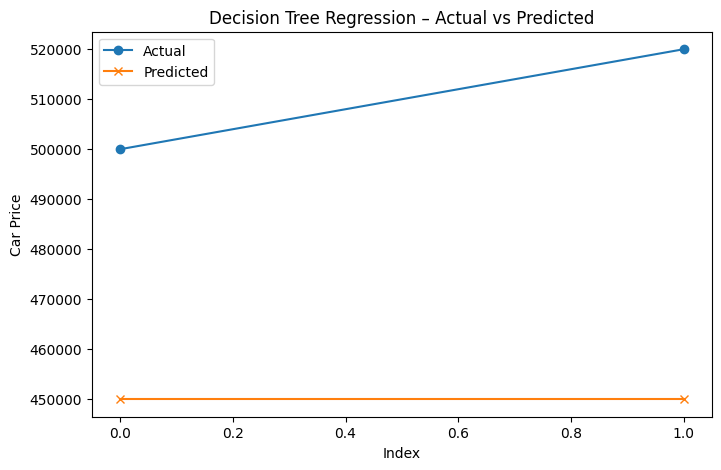

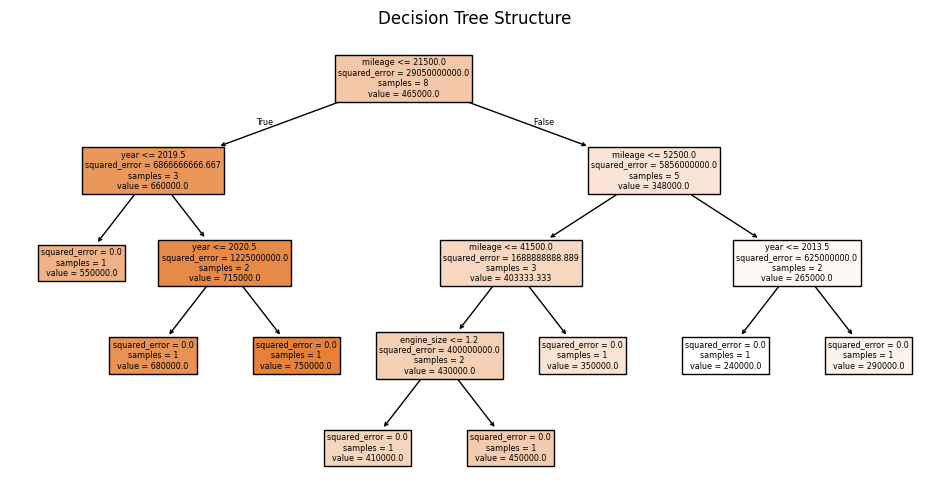


===== USER INPUT PREDICTOR =====
Enter car year: 2025
Enter engine size (e.g., 1.2): 1.4
Enter mileage (km): 25000

===== PREDICTED PRICE =====
Estimated Car Price: ₹450000
 _____        _  _   _____  ___   ___   ___   ___  
|  __ \      | || | | ____|/ _ \ / _ \ / _ \ / _ \ 
| |__) |___  | || |_| |__ | | | | | | | | | | | | |
|  _  // __| |__   _|___ \| | | | | | | | | | | | |
| | \ \\__ \    | |  ___) | |_| | |_| | |_| | |_| |
|_|  \_\___/    |_| |____/ \___/ \___/ \___/ \___/ 
                                                   
                                                   



In [7]:
# Decision Tree Regression – Predict Car Prices

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
import openpyxl  # For Excel file

# 1. Upload Excel
from google.colab import files
uploaded = files.upload()

df = pd.read_excel(list(uploaded.keys())[0])
print("\n===== DATA LOADED FROM EXCEL FILE =====")
print(df.head().to_string())

# 2. Split columns
X = df[['year', 'engine_size', 'mileage']]
y = df['price']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train Decision Tree Regression
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

print("\n===== MODEL TRAINED SUCCESSFULLY =====")

# 5. ASCII Output – Predictions
preds = model.predict(X_test)

print("\n===== ASCII OUTPUT – PREDICTIONS =====")
for i in range(len(preds)):
    print(f"Car {i+1} | Actual: ₹{y_test.iloc[i]} | Predicted: ₹{int(preds[i])}")

# 6. Plot Actual vs Predicted
plt.figure(figsize=(8,5))
plt.plot(range(len(preds)), y_test.values, marker='o', label='Actual')
plt.plot(range(len(preds)), preds, marker='x', label='Predicted')
plt.xlabel("Index")
plt.ylabel("Car Price")
plt.title("Decision Tree Regression – Actual vs Predicted")
plt.legend()
plt.show()

# 7. Tree Visualization
plt.figure(figsize=(12,6))
tree.plot_tree(model, feature_names=X.columns, filled=True)
plt.title("Decision Tree Structure")
plt.show()

# 8. User Input Prediction
print("\n===== USER INPUT PREDICTOR =====")

u_year = int(input("Enter car year: "))
u_engine = float(input("Enter engine size (e.g., 1.2): "))
u_mileage = int(input("Enter mileage (km): "))

user_df = pd.DataFrame([[u_year, u_engine, u_mileage]],
                       columns=['year', 'engine_size', 'mileage'])

predicted_price = int(model.predict(user_df)[0])

print("\n===== PREDICTED PRICE =====")
print(f"Estimated Car Price: ₹{predicted_price}")

# 9. ASCII ART – FINAL OUTPUT (Big text)
!pip install pyfiglet
import pyfiglet

ascii_result = pyfiglet.figlet_format(f"Rs {predicted_price}", font="big")
print(ascii_result)
